In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("../measurements/layer_8/tensor_regression/map.csv")

In [3]:
df["ratio"] = (128*26*26*4) / (df["data_size_mean"] /8)

In [4]:
df.head()

,video_name,pruning_thresh,jepg_quality,data_size_mean,data_size_std,sparsity,decomposability,regularity,pictoriality,map,...,map_75,map_small,map_medium,map_large,mar_1,mar_100,mar_small,mar_medium,mar_large,ratio
0,b610204c-e3c8c65f,0.0,1,255558.0,0.0,0.0,-1.00000,0.137238,0.158353,0.000908,...,0.0,0.001980,0.000743,-1.0,0.001154,0.001154,0.001418,0.001389,-1.0,10.834707
1,b610204c-e3c8c65f,0.0,2,256582.0,0.0,0.0,-1.00000,0.134738,0.155477,0.000990,...,0.0,0.001980,0.000000,-1.0,0.000769,0.000769,0.001418,0.000000,-1.0,10.791466
2,b610204c-e3c8c65f,0.0,3,257606.0,0.0,0.0,-0.99994,0.133945,0.153872,0.000990,...,0.0,0.001980,0.000000,-1.0,0.000769,0.000769,0.001418,0.000000,-1.0,10.748570
3,b610204c-e3c8c65f,0.0,4,258630.0,0.0,0.0,-1.00000,0.132179,0.151366,0.001558,...,0.0,0.004620,0.000000,-1.0,0.001154,0.001907,0.003156,0.000000,-1.0,10.706012
4,b610204c-e3c8c65f,0.0,5,259654.0,0.0,0.0,-1.00000,0.131525,0.150814,0.001736,...,0.0,0.005941,0.000000,-1.0,0.001154,0.002509,0.003980,0.000000,-1.0,10.663791


In [28]:
pics =[]
regs = []
maps =[]
keys =[]
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    keys.append(key)
    pics.append(dfg["pictoriality"].to_list()[2])
    regs.append(dfg["regularity"].to_list()[2])
    maps.append(dfg["map_50"].to_list()[2])

In [29]:
dfg["pictoriality"]

20    0.128209
21    0.128502
22    0.127984
23    0.127962
24    0.127626
Name: pictoriality, dtype: float64

In [30]:
pics

[0.1538723493140301,
 0.1347864441632606,
 0.1309624815265389,
 0.1293533242023436,
 0.1279843252376658]

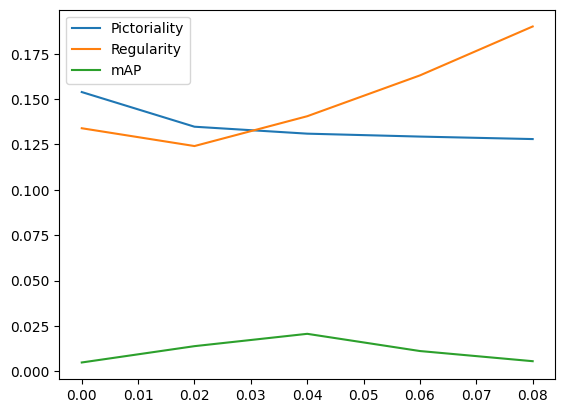

In [33]:
plt.figure()
plt.plot(keys,pics,label="Pictoriality")
plt.plot(keys,regs,label="Regularity")
plt.plot(keys, maps,label="mAP")
plt.legend()